## Do general imports

In [1]:

import matplotlib.pyplot as plt
import pandas as pd

import exploration.analytics_plots as vs

pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 14})


## Load Datasets

In [2]:
issues_df = pd.read_csv('./temp_data/issues.csv', index_col=["id"])
issues_df['issue_created'] = pd.to_datetime(issues_df['issue_created'])
print(F'Total records in dataset %i' % len(issues_df))

Total records in dataset 66691


### Plot issues per year

/home/jovyan/work/notebooks/exploration/analytics_plots.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(by_month_grouped.index, rotation=90)


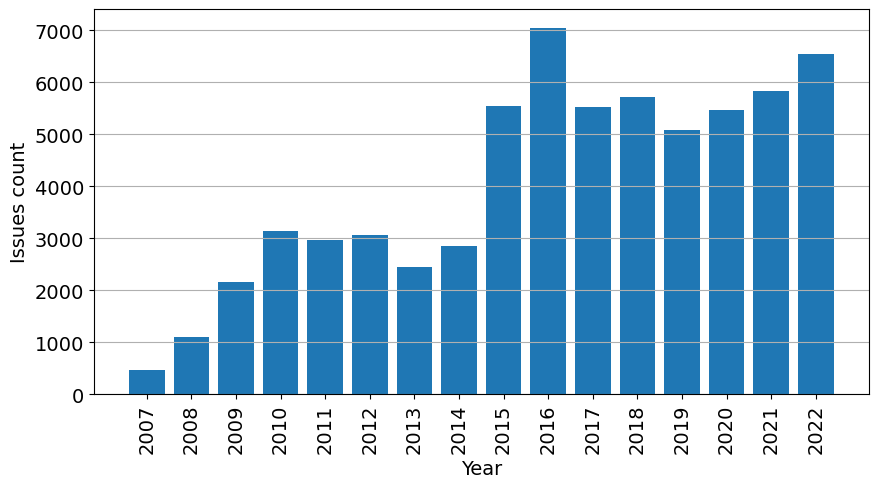

In [3]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
df = issues_df[(issues_df['issue_created'] <= '2022-12-31')]
vs.plot_issues_by_year(df,ax)

### Keep the issues reported in 2022 for the study

In [4]:


# types = ['Ticket','Service','Deployment','HD Service','Project']
types = ['Ticket','Deployment','HD Service']

issues_df = issues_df[(issues_df['issue_proj'].str.match('\w{2}\d{2}\w{1,}'))
                      & (issues_df['issue_type'].isin(types))
                      & (issues_df['issue_created'] >= '2022-01-01')
                      & (issues_df['issue_created'] <= '2022-12-31')
                      & pd.notna(issues_df['issue_resolution_date'])]
                      # & (issues_df['issue_priority'] == 'High')]
print(F'Total records after filter %i' % len(issues_df))

issues_df.head(1)

Total records after filter 5451


,started,ended,issue_num,issue_proj,issue_reporter,issue_assignee,issue_contr_count,issue_type,issue_priority,issue_created,issue_resolution_date,issue_resolution,issue_status,issue_comments_count,last_change_date,wf_in_review,wfe_in_review,wf_deployment,wfe_deployment,wf_resolved,wfe_resolved,wf_open,wfe_open,wf_monitoring,wfe_monitoring,wf_done,wfe_done,wf_pending_customer_approval,wfe_pending_customer_approval,wf_rejected,wfe_rejected,wf_testing_monitoring,wfe_testing_monitoring,wf_in_progress,wfe_in_progress,wf_reopened,wfe_reopened,wf_to_do,wfe_to_do,wf_validation,wfe_validation,wf_resolved_under_monitoring,wfe_resolved_under_monitoring,wf_closed,wfe_closed,wf_waiting,wfe_waiting,wf_cancelled,wfe_cancelled,wf_under_review,wfe_under_review,wf_approved,wfe_approved,wf_pending_deployment,wfe_pending_deployment,wf_total_time,processing_steps
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1006845.0,2022-06-05 07:56:43+00:00,2022-06-29 07:17:20+00:00,3448.0,QA00QIB,qa.qib.03,u895,1.0,HD Service,Medium,2022-06-05 07:56:43+00:00,2022-06-29 07:17:15+00:00,Done,closed,8,2022-06-29 07:17:20+00:00,NaN,0,NaN,0,NaN,0,1460.0,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2069777.0,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2071237.0,2


### Find number of tickets peer type

In [5]:
print(issues_df['issue_type'].value_counts())
print(len(issues_df['issue_proj'].unique()))

Ticket        5250
Deployment     106
HD Service      95
Name: issue_type, dtype: int64
232


In [6]:
issues_df.head(2)

,started,ended,issue_num,issue_proj,issue_reporter,issue_assignee,issue_contr_count,issue_type,issue_priority,issue_created,issue_resolution_date,issue_resolution,issue_status,issue_comments_count,last_change_date,wf_in_review,wfe_in_review,wf_deployment,wfe_deployment,wf_resolved,wfe_resolved,wf_open,wfe_open,wf_monitoring,wfe_monitoring,wf_done,wfe_done,wf_pending_customer_approval,wfe_pending_customer_approval,wf_rejected,wfe_rejected,wf_testing_monitoring,wfe_testing_monitoring,wf_in_progress,wfe_in_progress,wf_reopened,wfe_reopened,wf_to_do,wfe_to_do,wf_validation,wfe_validation,wf_resolved_under_monitoring,wfe_resolved_under_monitoring,wf_closed,wfe_closed,wf_waiting,wfe_waiting,wf_cancelled,wfe_cancelled,wf_under_review,wfe_under_review,wf_approved,wfe_approved,wf_pending_deployment,wfe_pending_deployment,wf_total_time,processing_steps
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1006845.0,2022-06-05 07:56:43+00:00,2022-06-29 07:17:20+00:00,3448.0,QA00QIB,qa.qib.03,u895,1.0,HD Service,Medium,2022-06-05 07:56:43+00:00,2022-06-29 07:17:15+00:00,Done,closed,8,2022-06-29 07:17:20+00:00,NaN,0,NaN,0,NaN,0,1460.0,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2069777.0,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,2071237.0,2
1006401.0,2022-05-08 11:49:42+00:00,2022-05-08 11:58:52+00:00,527.0,JO00JDIB,jo.jdib.06,u792,2.0,Ticket,High,2022-05-08 11:49:42+00:00,2022-05-08 11:58:42+00:00,Done,closed,5,2022-05-08 11:58:52+00:00,NaN,0,NaN,0,8.0,1,97.0,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,389.0,2,12.0,1,NaN,0,NaN,0,NaN,0,44.0,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,550.0,6


### Explore reported issues by priority

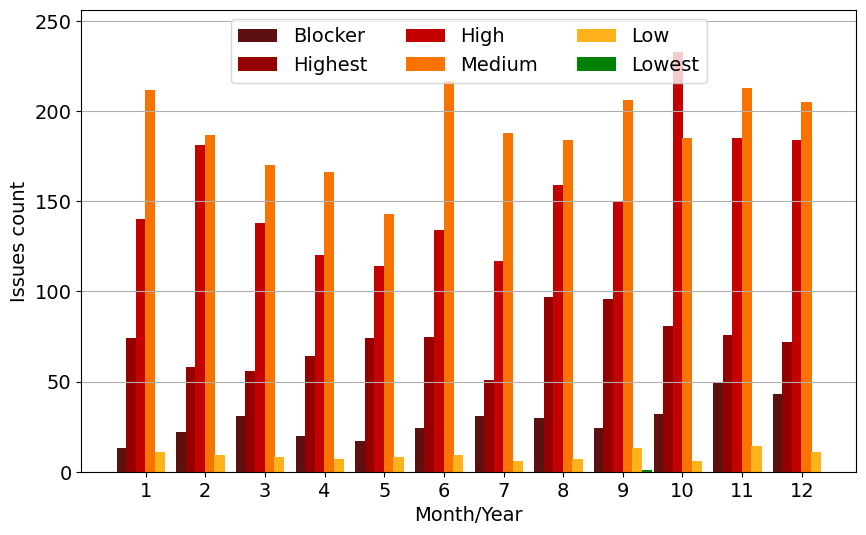

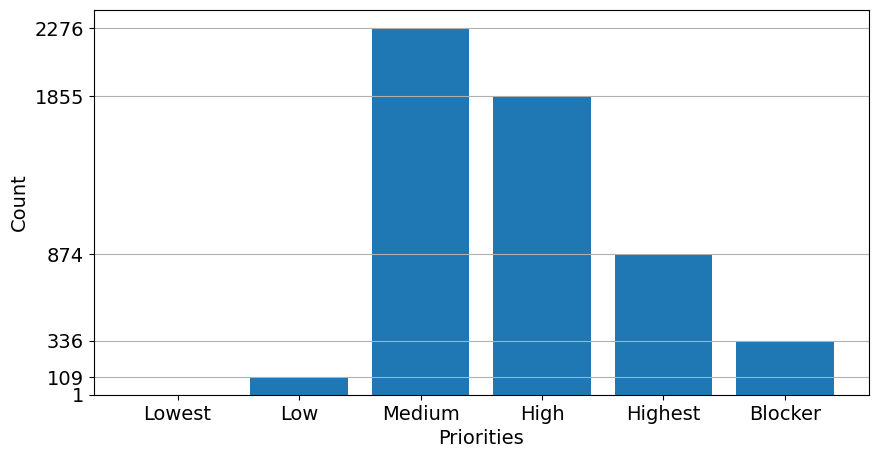

In [7]:
# plt.autoscale(enable=False)

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)
vs.plot_issues_by_month(issues_df, ax)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
vs.plot_issues_by_priority(issues_df, ax)

# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# vs.plot_total_time_bin(issues_df, result, ax)

# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# vs.plot_box_by_issue_category(issues_df, result, ax)

## Inspect comments

### Explore issues spent time Vs. Comments

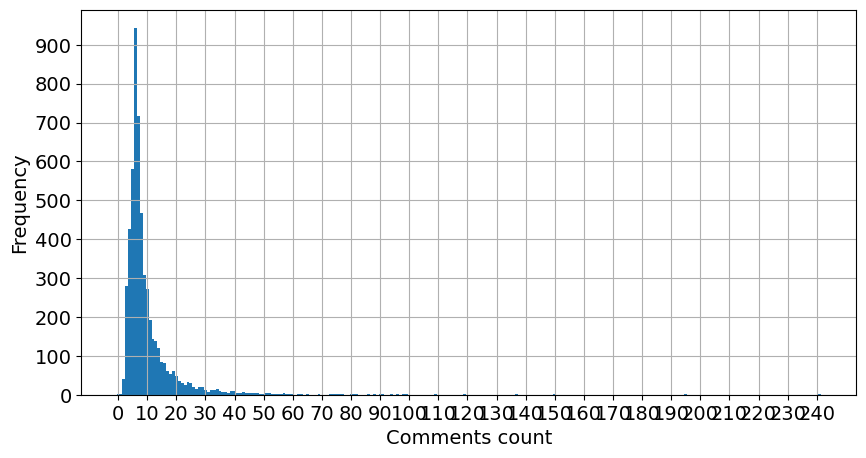

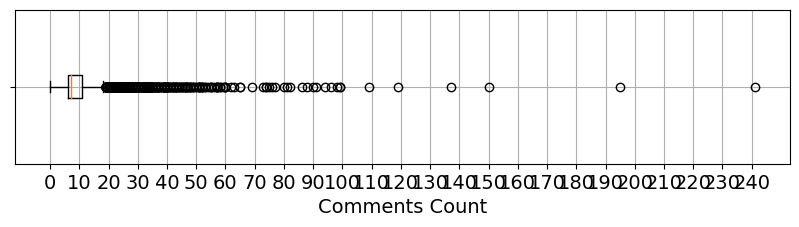

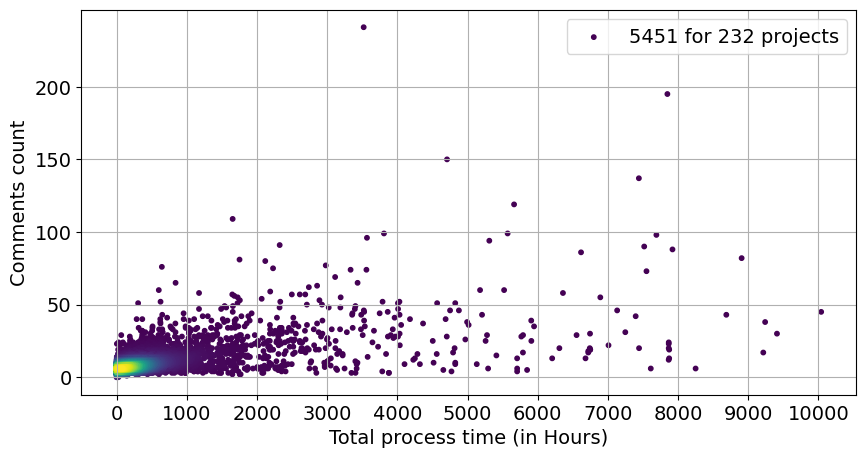

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
# ax.autoscale(enable=False)
vs.plot_comments_count_frequency(issues_df, ax)

fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
vs.plot_comments_count_summary(issues_df, ax)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
vs.plot_comments_count_time_spent(issues_df, ax)

## Total spent time analysis

### Plot summary for each workflow step

In [9]:
vs.wf_steps_summary(issues_df, divider = 60).round(2)

,count,mean,std,min,25%,50%,75%,max
open,"5,451.00","1,637.52","10,329.02",1.00,1.00,2.00,13.00,"248,342.00"
in progress,"4,336.00","5,908.91","18,723.37",1.00,24.00,179.00,"3,608.25","423,255.00"
resolved,"3,120.00","3,226.50","14,583.52",1.00,1.00,5.00,"1,416.50","456,561.00"
waiting,"3,081.00","23,717.43","46,734.44",1.00,"1,453.00","8,656.00","26,049.00","554,413.00"
validation,402.00,"39,856.89","65,801.20",1.00,"5,625.75","15,680.50","41,326.25","393,179.00"
resolved under monitoring,369.00,"15,236.66","29,638.37",1.00,"2,369.00","6,765.00","15,617.00","265,458.00"
pending deployment,311.00,"33,552.06","56,650.69",1.00,"1,471.00","14,148.00","40,428.50","388,895.00"
closed,223.00,"10,290.15","33,621.83",1.00,2.00,35.00,"3,880.00","242,409.00"
reopened,196.00,"1,202.06","5,406.63",1.00,1.00,2.00,7.00,"60,307.00"
cancelled,32.00,"1,189.44","5,600.01",1.00,1.00,1.00,1.25,"31,148.00"


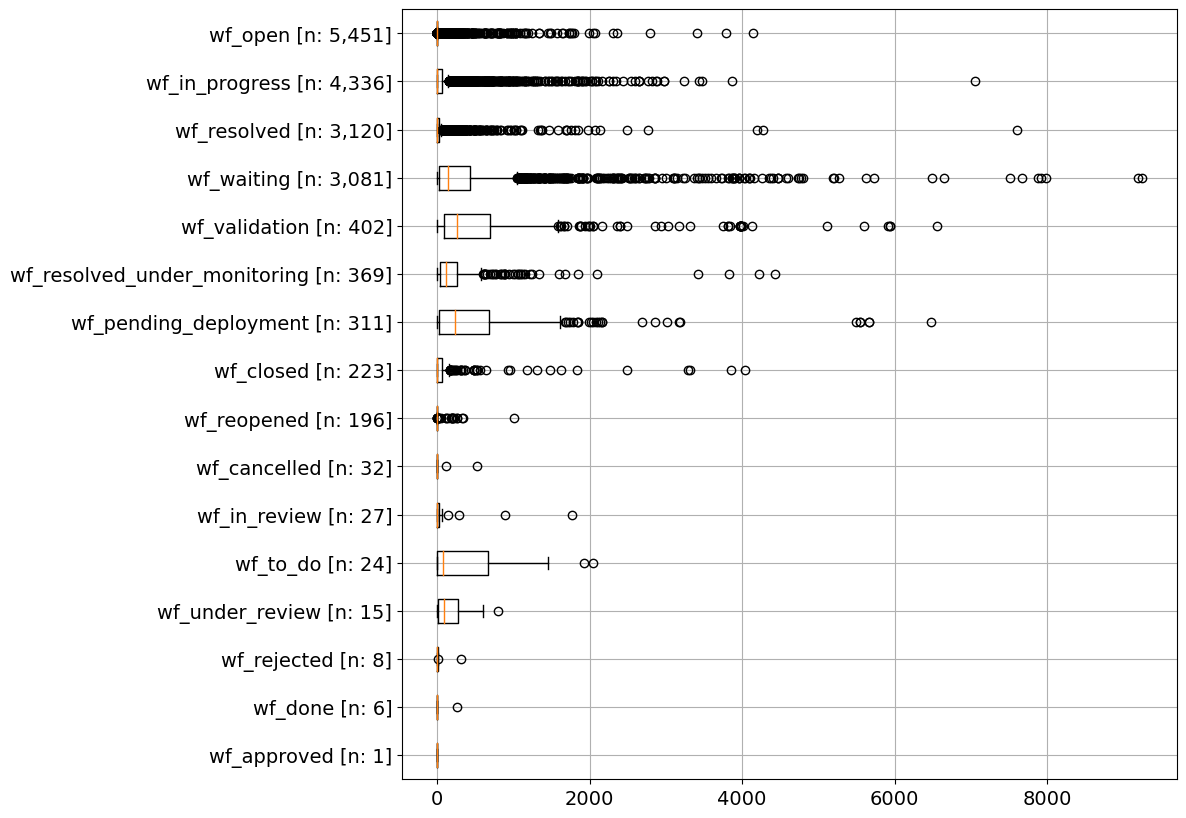

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

vs.plot_wf_spent_summary(issues_df, ax,divider = 60*60)

### plot summary for total workflow time

,count,mean,std,min,25%,50%,75%,max
processing_steps,5451.0,4.321959,2.172554,1.0,3.0,4.0,5.0,35.0


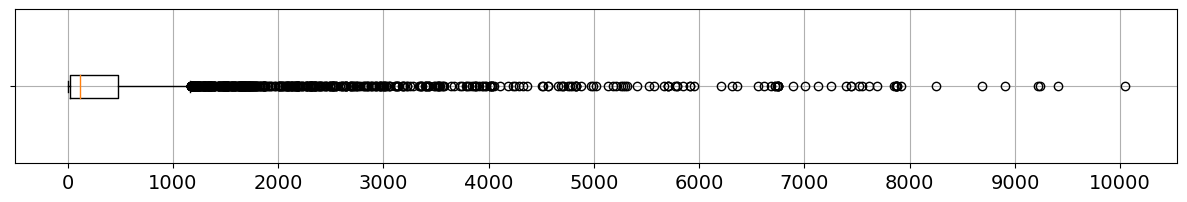

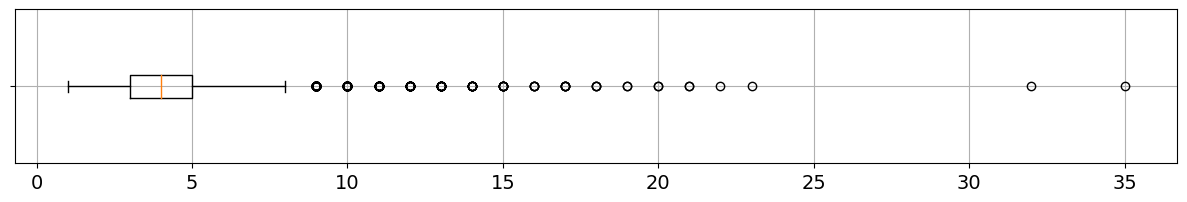

In [11]:
fig = plt.figure(figsize=(15, 2))

ax = fig.add_subplot(111)
vs.plot_wf_total_time_summary(issues_df, ax)

fig = plt.figure(figsize=(15, 2))
ax = fig.add_subplot(111)
vs.plot_issues_processing_steps(issues_df, ax)

issues_df[['processing_steps']].describe().transpose()

In [12]:
t = issues_df[['wf_total_time']].copy()
t['wf_total_time'] = t['wf_total_time']/(60*60*24)
t[['wf_total_time']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wf_total_time,5451.0,19.532471,40.654628,0.000625,0.874566,5.0164,19.882674,418.3011


### Explore the relation between steps count and total processing time

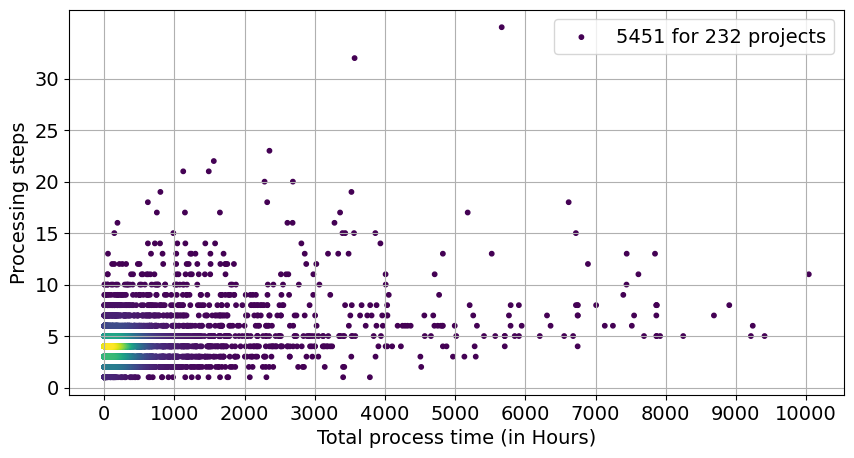

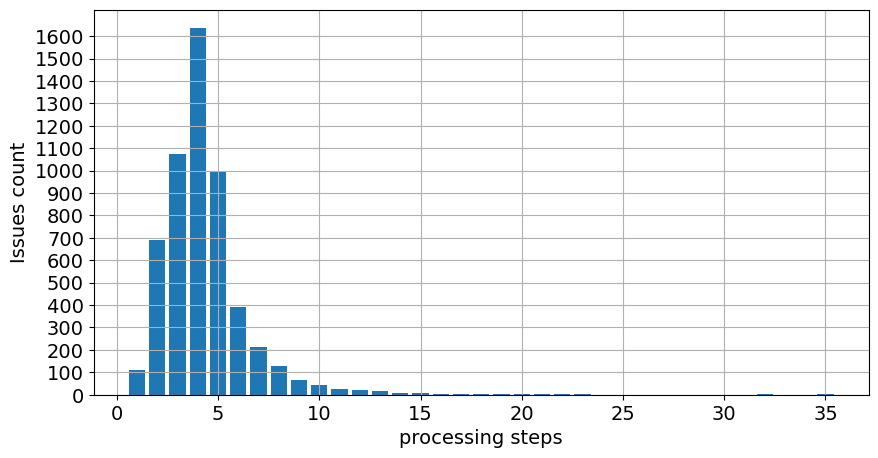

In [13]:
# fig = plt.figure(figsize=(20, 6))

# max_ps = issues_df['processing_steps'].max()
# max_wf_time = issues_df['wf_total_time'].max()

# proj_cat = issues_df['proj_category'].drop_duplicates().sort_values()
# for i,c in enumerate(proj_cat):    
#     ax = fig.add_subplot(2,3,i+1)
#     df = issues_df[issues_df['proj_category'] == c]
#     vs.plot_relation_between_processing_steps_and_time(df, ax, max_x = math.ceil(max_wf_time), max_y=math.ceil(max_ps))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
vs.plot_relation_between_processing_steps_and_time(issues_df, ax)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
vs.plot_processing_steps_frequency(issues_df, ax)

### Explore number of contributors for each ticket

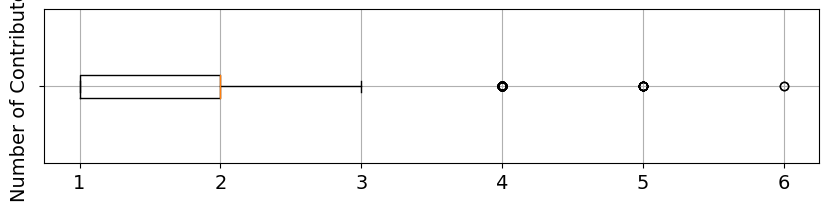

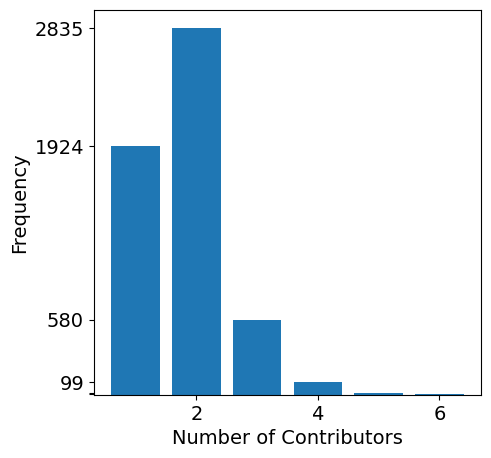

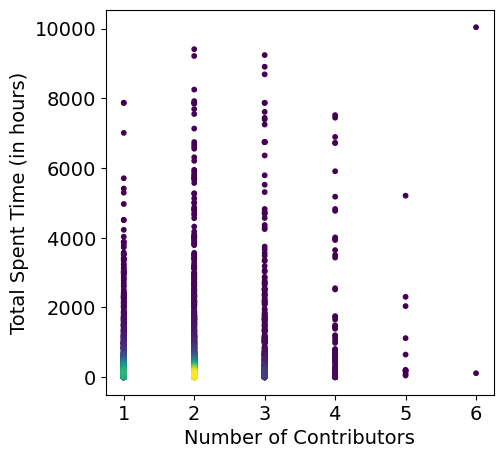

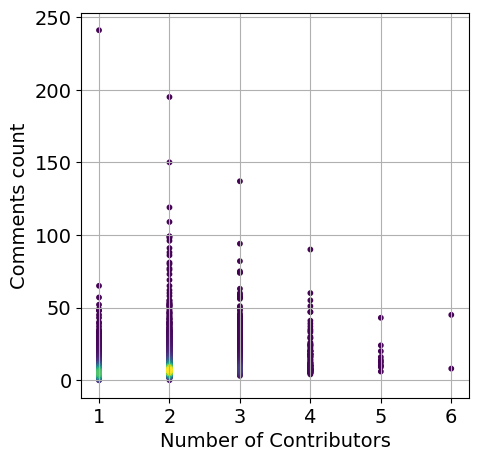

In [14]:
contr = issues_df[['issue_contr_count']]

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)

vs.plot_issue_contributors_summary(contr, ax)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
vs.plot_issue_contributors_frequency(contr, ax)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
vs.plot_issue_contributors_to_total_spent_time(issues_df, ax)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
vs.plot_issue_contributors_to_total_comments(issues_df, ax)